Subsections for tensor formulation.

- 16/07/23:
    - New version for tidy-up/July 2023
    - Added some more general/review refs
    - General tidy-up
        - Removed most old notes and hidden cells.
        - Code tidy up.
- 27/04/23: numerics now broken in build...?? WTF???
   - UPDATE: fixed at cell 7 by adding `thres=None` to `BetaNormX2, basisFull = ep.geomFunc.afblmXprod(data.data[data.subKey]['matE'], basisReturn = 'Full', thres=None, selDims={}, sqThres=False)` Must have been change in afblmXprod defaults?
- 22/11/22: basics in place and all refs present.

TODO

- Numerical examples, see https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_090420_tidy.html#E_{P,R}-tensor (and MF recon manuscript working notes?). Should be able to redo for general case working from symHarms as matrix elements (i.e. no external codes needed).
   - benchmarks, or link to them (see test fitting notebooks...?).
- Tidy up notation in some places.
- Full extended tensor formulation as per Appendix in MF recon paper? Probably should add in here.
   - Best working notes? Try https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basis-set_demo_050621-full.html, also try updates for MF recon manuscript in http://jake:9966/lab/tree/code-share/jupyter-shared/PEMtk_dev_2022/basisSets/PEMtk_fitting_basis-set_demo_050621-full-revisit-Jake_040822.ipynb. Q: did this make it to Figshare repo? Looks like missing? See also Trello notes...
   - AH, original workspace for MF recon case: http://jake/jupyter/user/paul/lab/workspaces/MFreconBasisSets, and main notebook (may not be final version?) http://jake/jupyter/user/paul/doc/tree/code-share/stimpy-docker-local/MFPADs_recon_manuscript_dev_April_2022/MFrecon_manuscript_fig_generation_170422-Stimpy_MAIN-oldPkgs.ipynb

(sec:tensor-formulation)=
# Tensor formulation of photoionization

A number of authors have treated {{ PADs }} and related problems in the context of photoionization theory and matrix element reconstruction (see {{ QM2 }} Chpt. 8 for examples and discussion, a range of review articles can also be found in the literature, e.g. Refs. {cite}`Becker1998, Reid2003, Kleinpoppen2005, kleinpoppen2013perfect`); herein, a geometric tensor based formalism is developed, which is close in spirit to the treatments given by Underwood and co-workers {cite}`Reid2000,Stolow2008,Underwood2000`, but further separates various sets of physical parameters into dedicated tensors; this allows for a unified theoretical and numerical treatment, where the latter computes properties as tensor variables which can be further manipulated and investigated to give detailed insights into various aspects of photoionization for the system at hand, and implications/effects for matrix element retrieval in a given case. Furthermore, the tensors can readily be converted to a density matrix representation {cite}`BlumDensityMat,zareAngMom`, which is more natural for some quantities, and also emphasizes the link to quantum state tomography and other quantum information techniques. Much of the theoretical background, as well as application to aspects of the current problem, can be found in the textbooks of Blum {cite}`BlumDensityMat` and Zare {cite}`zareAngMom`. 

Within this treatment, the observables can be defined in a series of simplified forms, emphasizing the quantities of interest for a given problem. The most general, and simplest, form is given in {numref}`Sect. %s <sec:channel-funcs>`, in terms of {{ GAMMACHANNEL }}, and the remainder of this section ({numref}`Sect. %s <sec:full-tensor-expansion>` - {numref}`sec:theory:tensor-products`) gives a detailed breakdown of the various components of the {{ GAMMACHANNEL }}, and numerical examples.




(sec:channel-funcs)=
## Channel functions

A simple form of the equations[^eqFootnote], amenable to fitting and numerical implementation, is to write the observables in terms of {{ GAMMACHANNEL }}, which define the ionization continuum for a given case and set of parameters $u$ (e.g. defined for the {{ MF }}, or defined for a specific experimental configuration),

$$\beta_{L,M}^{u}=\sum_{\zeta,\zeta'}\varUpsilon_{L,M}^{u,\zeta\zeta'}\mathbb{I}^{\zeta\zeta'}$$ (eqn:channel-fns)

Where $\zeta,\zeta'$ collect all the required quantum numbers, and
define all (coherent) pairs of components. The term
$\mathbb{I}^{\zeta\zeta'}$ denotes the coherent square of the ionization
matrix elements:

$$\mathbb{I}^{\zeta,\zeta}=I^{\zeta}(\epsilon)I^{\zeta'*}(\epsilon)
$$ (eqn:I-zeta)

Eq. {eq}`eqn:channel-fns` is effectively a convolution equation (cf. Refs. {cite}`Reid2000,gregory2021MolecularFramePhotoelectron`) with channel functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$, for a given "experiment" $u$, summed over all terms $\zeta,\zeta'$. Aside from the change in notation (which is here chosen to match the formalism of Refs. {cite}`Gianturco1994, Lucchese1986,Natalense1999`), 
these matrix elements are essentially identical to the simplified {{ RADMATE }}
$\mathbf{r}_{k,l,m}$ defined in Eq. {eq}`eq:r-kllam`, in the case where $\zeta=\{k,l,m\}$. Similarly, the {{ GAMMACHANNEL }} are essentially nothing but a slightly different form of the {{ GEOMPARAMS }} of Eqs. {eq}`eq:r-kllam`, {eq}`eq:I-reduced-LF-2_45-vol1`, incorporating all required geometric parameters.
Note, also, that the {{ RADMATE }} used herein are usually assumed to be symmetrized (unless explicitly stated), i.e. expanded in {{ SYMHARM }} per Eq. {eq}`eq:symHarm-defn`, but with any additional symmetry parameters $b_{hl\lambda}^{\Gamma\mu}$ incorporated into the value of the {{ RADMATE }}.


These complex matrix elements can also be equivalently defined in a magnitude, phase
form:

$$I^{\zeta}(\epsilon)\equiv\mathbf{r}_{\zeta}\equiv r_{\zeta}e^{i\phi_{\zeta}}$$(eqn:I-zeta-mag-phase)

This tensorial form is numerically implemented in the {{ ePSproc_repo }} codebase, and is in contradistinction to standard numerical routines in which the requisite terms are usually computed from vectorial and/or nested summations. The {{ PEMtk_repo }} codebase implements {{ RADMATE }} retrieval based on the tensor formalism, with pre-computation of all the geometric tensor components ({{ GAMMACHANNEL }}) prior to a fitting protocol for matrix element analysis, essentially a fit to Eqn. {eq}`eqn:channel-fns`, with terms $I^{\zeta}(\epsilon)$ as the unknowns (in magnitude, phase form per {eq}`eqn:I-zeta-mag-phase`). The main computational cost of a tensor-based approach is that more RAM is required to store the full set of tensor variables; however, the method is computationally efficient since it is inherently parallel (as compared to a traditional, serial loop-based solution), hence may lead to significantly faster evaluation of observables. Furthermore, the method allows for the computational routines to match the formalism quite closely, and for the investigation of the properties of the {{ GAMMACHANNEL }} for a given problem in general terms, as well as for specific experimental cases including examination of specific couplings/effects. (Again, this is in contrast to standard nested-loop routines, which can be somewhat opaque to detailed interpretation, and typically implement the full computation of the observables in one monolithic computational routine; they do, however, have significantly lower RAM requirements since the full multi-dimensional basis tensors are not required to be stored.) {numref}`Sect. %s <sec:full-tensor-expansion>` provides details of the tensor components of the {{ GAMMACHANNEL }}, and the remainder of this section breaks these down further, including numerical examples, and discussion of their significance for fitting problems in specific cases.

[^eqFootnote]: Cf. the general form of Eq. {eq}`eq:I-reduced-LF-2_45-vol1`. See also {{ QM2 }} Chpt. 12 for early discussion and motivation for this formalism.

% TODO: numerical examples here or below.
% TODO: benchmarks, or link to them (see test fitting notebooks...?).

(sec:full-tensor-expansion)= 
## Full tensor expansion

In more detail, the {{ GAMMACHANNEL }} $\varUpsilon_{L,M}^{u,\zeta\zeta'}$ can be given as a set of tensors, defining each aspect of the problem. The following equations illustrate this for the {{ MF }} and {{ LF }}/{{ AF }} cases, fully expanding the general form of Eq. {eq}`eqn:channel-fns` in terms of the relevant tensors. Further details and numerical examples are given in the following sub-sections.

For the {{ MF }}:

$$\begin{aligned}
\beta_{L,-M}^{\mu_{i},\mu_{f}}(\epsilon) & = & (-1)^{M}\sum_{P,R',R}{[P]^{\frac{1}{2}}}{E_{P-R}(\hat{e};\mu_{0})}\\
 & \times &\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\Lambda_{R',R}(R_{\hat{n}};\mu,P,R,R')B_{L,-M}(l,l',m,m')}\\
 & \times & I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\epsilon)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(\epsilon)\end{aligned}$$ (eq:BLM-tensor-MF)

And the {{ LF }}/{{ AF }} as:

$$\begin{aligned}
\bar{\beta}_{L,-M}^{\mu_{i},\mu_{f}}(\epsilon,t) & = & (-1)^{M}\sum_{P,R',R}{[P]^{\frac{1}{2}}}{E_{P-R}(\hat{e};\mu_{0})}\\
 & \times &\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\bar{\Lambda}_{R'}(\mu,P,R')B_{L,S-R'}(l,l',m,m')}\\
 & \times &I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\epsilon)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(\epsilon)\sum_{K,Q,S}\Delta_{L,M}(K,Q,S)A_{Q,S}^{K}(t)\end{aligned}$$ (eq:BLM-tensor-AF)

In both cases a set of geometric tensor terms are required, 
% which are fully defined in Appendix [\[appendix:formalism\]](#appendix:formalism){reference-type="ref" reference="appendix:formalism"}; 
these terms provide details of:

-   ${E_{P-R}(\hat{e};\mu_{0})}$: polarization geometry & coupling with
    the electric field.

-   $B_{L,M}(l,l',m,m')$: geometric coupling of the partial waves into the $\beta_{L,M}$ terms (spherical tensors). Note for the {{ AF }} case the terms may be reindexed by $M=S-R'$, which allows for the projection dependence on the {{ ADMs }} (see below).

-   $\Lambda_{R',R}(R_{\hat{n}};\mu,P,R,R')$, $\bar{\Lambda}_{R'}(\mu,P,R')$: frame couplings and rotations (note slightly different terms for {{ MF }} and {{ AF }}).

-   $\Delta_{L,M}(K,Q,S)$: alignment frame coupling ({{ LF }}/{{ AF }} only).

-   $A_{Q,S}^{K}(t)$: ensemble alignment described as a set of {term}`axis distribution moments` ({{ ADMs }}, {{ LF }}/{{ AF }} only).  Note for a one-photon ionization case - the traditional {{ LF }} experiment - there will only be a single term, $K=Q=S=0$, with no time-dependence, which describes an isotropic molecular ensemble. In general only the {{ AF }} is discussed explicitly herein, but it is of note that this is identical to the traditional {{ LF }} definition for this limiting case of an isotropic ensemble.

- Square-brackets are short-hand for degeneracy terms, e.g. $[P]^{\frac{1}{2}} = (2P+1)^{\frac{1}{2}}$.

And $I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\epsilon)$ are the {{ RADMATE }}, as a function of energy $\epsilon$.
As noteed above, these {{ RADMATE }} are essentially identical to the simplified forms
$r_{k,l,m}$ defined in Eqn. {eq}`eq:r-kllam`, except now with additional indices to label
symmetry and polarization components defined by a set of {{ PARTIALWAVES }}
$\{l,m\}$, for polarization component $\mu$ (denoting the photon angular
momentum components) and channels (symmetries) labelled by initial and
final state indexes $(p_{i}\mu_{i},p_{f}\mu_{f})$. The notation here
follows that used by {{ ePS_full }}, and these matrix elements again represent the quantities to be obtained numerically from data analysis, or from an [ePolyScat (or similar) calculation](https://epsproc.readthedocs.io/en/latest/ePS_ePSproc_tutorial/ePS_tutorial_080520.html#Theoretical-background).

% [Numerical example here, or already included above somewhere]


Following the tensor components detailed above, the full form of the {{ GAMMACHANNEL }} of Eq. {eq}`eqn:channel-fns` for the {{ AF }} and {{ MF }} can be written as:

$$
\begin{aligned}
\varUpsilon_{L,M}^{u,\zeta\zeta'} & = & (-1)^{M}{[P]^{\frac{1}{2}}}E_{P-R}(\hat{e};\mu_{0})(-1)^{(\mu'-\mu_{0})}\Lambda_{R',R}(R_{\hat{n}};\mu,P,R,R')\\
 & \times & B_{L,-M}(l,l',m,m')\end{aligned}
$$ (eq:channelFunc-MF-defn)


$$
\begin{aligned}
\bar{\varUpsilon_{}}_{L,M}^{u,\zeta\zeta'} & = & (-1)^{M}[P]^{\frac{1}{2}}E_{P-R}(\hat{e};\mu_{0})(-1)^{(\mu'-\mu_{0})}\bar{\Lambda}_{R'}(\mu,P,R')\\
 & \times & B_{L,S-R'}(l,l',m,m')\Delta_{L,M}(K,Q,S)A_{Q,S}^{K}(t)\end{aligned}
$$ (eq:channelFunc-AF-defn)

% NOTE `\bar{\varUpsilon_{}}` instead of `\bar{\varUpsilon}` to avoid XeLatex rendering bug.

Note that, in this case as given, time-dependence arises purely from the
$A_{Q,S}^{K}(t)$ terms in the AF case, and the electric field term
currently describes only the photon angular momentum coupling, although
can in principle also describe time-dependent/shaped fields. Similarly,
a time-dependent initial state (e.g. a vibrational wavepacket) could
also describe a time-dependent MF case.

It should be emphasized, however, that the underlying physical
quantities are essentially identical in all the theoretical approaches,
with a set of coupled angular-momenta defining the {{ GEOMPARAMS }} part of
the photoionization problem, despite these differences in the details of
the theory and notation.

The various tensors defined above are implemented as functions in the {{ ePSproc_full }}, and further wrapped for fitting cases in the {{ PEMtk_repo }}. In the remainder of this section, numerical examples using these codes are illustrated and explored. Full computational details can be found in the {{ ePSproc_docs }}, including [extended discussion of each tensor](https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_260220_090420_tidy.html) and complete function references in the [geomCalc submodule documentation](https://epsproc.readthedocs.io/en/latest/modules/epsproc.geomFunc.geomCalc.html).

## Numerical aside: symmetry-defined channel functions

In the following sub-sections, each component is defined in detail, including numerical examples. For illustration purposes, the numerical example uses a minimal set of assumptions, and is defined initially purely by symmetry, although further terms may be required for computation of some of the geometric terms and are discussed where required. A fuller discussion of symmetry considerations in photoionization can be found in {numref}`Sect. %s <sec:theory:symmetry-intro>`, and discussion of {{ SYMHARM }} in {numref}`Sect. %s <sec:theory:sym-harm-into>`.

For this example, the $D_{2h}$ point group is used, representing a fairly general case of a planar asymmetric top system, e.g. ethylene ($C_2H_4$). Note that, in this case, the symmetrization coefficients ($b_{hl\lambda}^{\Gamma\mu}$, see {eq}`eq:symHarm-defn`) have the property that $\mu=0$ only, and the $h$ index is redundant, since it maps uniquely to $l$ - see {numref}`tab-D2hXlm` - so these indexes can be dropped. Note, also, the unfortunate convention that the label $\mu$ is used for multiple indexes; to avoid ambiguity this term is remapped to $\mu_X$ in the numerics below. However, in this case, since $\mu$ can be dropped from the symmetrization coefficients, there is actually no ambiguity in later usage.



% TODO: consider different labelling here, can set at symHarm init, dims = ['C', 'h', 'mu', 'l', 'm']

````{margin}
```{note}
Full tabulations of the parameters available in HTML or notebook formats only.
```
````

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

# Set Matplotlib inline for lmPlot() with Seaborn display
%matplotlib inline

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-07-17 13:48:20
Working dir: /home/jovyan/QM3/doc-source/part1
Build env: notebook

* Loading packages...


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.2
Sphinx Book Theme : 1.0.1
Jupyter-Cache     : 0.6.1
NbClient          : 0.5.4


In [9]:
#*** Setup symmetry-defined matrix elements using PEMtk

# Import class
from pemtk.sym.symHarm import symHarm

#*** Compute hamronics for Td, lmax=4
sym = 'D2h'
lmax=4

lmaxPlot = 2  # Set lmaxPlot for subselection on plots later.

# Create symHarm object with given settings, this will also compute the symmetrized harmonics
symObj = symHarm(sym,lmax)


#*** To plot using ePSproc/PEMtk class, these values can be converted to ePSproc BLM data type...
# Run conversion - the default is to set the coeffs to the 'BLM' data type, additional dim mappings can also be set
# Outputs are set to symObj.coeffs[dataType]
dimMap = {'C':'Cont','mu':'muX'}
symObj.toePSproc(dimMap=dimMap)

# Run conversion with a different dimMap & dataType
# Outputs are set to symObj.coeffs[dataType]
dataType = 'matE'
symObj.toePSproc(dimMap = dimMap, dataType=dataType)

#*** Example using data class (setup in init script)
# This pushes the symmetrized coeffs computed above to the PEMtk fit class object for general use with PEMtk methods.
data = pemtkFit()

# Set to new key in data class
dataKey = sym
data.data[dataKey] = {}

# Set data.data[dataKey][dataType] from cases set above
for dataType in ['matE','BLM']:
    data.data[dataKey][dataType] = symObj.coeffs[dataType]['b (comp)'].sum(['h','muX'])  # Select expansion in complex harmonics, and sum redundant dims
    data.data[dataKey][dataType].attrs = symObj.coeffs[dataType].attrs

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type
Found dipole symmetries: 
{'B1u': {'m': [0], 'pol': ['z']}, 'B2u': {'m': [-1, 1], 'pol': ['y']}, 'B3u': {'m': [-1, 1], 'pol': ['x']}}
*** Mapping coeffs to ePSproc dataType = BLM
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim P
Added dim T
Added dim C
*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim it
Added dim Type


In [ ]:
# Glue items for later
glue("symHarmPGmatE", sym, display=False)
glue("symHarmLmaxmatE", lmax, display=False)
glue("symHarmBasislmaxPlot", lmaxPlot, display=False)

In [4]:
# Display results (real harmonics)
symObj.displayXlm(setCols='h')  #, dropLevels='mu')

# Glue version for JupyterBook output
glue("D2hXlm",symObj.displayXlm(setCols='h',returnPD=True), display=False)  # As above, but with PD object return and glue.

b                         
h                                         0    1    2    3    4    5
Character ($\Gamma$) PFIX ($\mu$) l m                               
A1g                  0            0  0  1.0                         
                                  2  0       1.0                    
                                     2            1.0               
                                  4  0                 1.0          
                                     2                      1.0     
                                     4                           1.0
A1u                  0            3 -2  1.0                         
B1g                  0            2 -2  1.0                         
                                  4 -4       1.0                    
                                    -2            1.0               
B1u                  0            1  0  1.0                         
                                  3  0       1.0                    
                                     2            1.0               
B2g                  0            2  1  1.0                         
                                  4  1       1.0                    
                                     3            1.0               
B2u                  0            1 -1  1.0                         
                                  3 -3       1.0                    
                                    -1            1.0               
B3g                  0            2 -1  1.0                         
                                  4 -3       1.0                    
                                    -1            1.0               
B3u                  0            1  1  1.0                         
                                  3  1       1.0                    
                                     3            1.0

b                         
h                                         0    1    2    3    4    5
Character ($\Gamma$) PFIX ($\mu$) l m                               
A1g                  0            0  0  1.0                         
                                  2  0       1.0                    
                                     2            1.0               
                                  4  0                 1.0          
                                     2                      1.0     
                                     4                           1.0
A1u                  0            3 -2  1.0                         
B1g                  0            2 -2  1.0                         
                                  4 -4       1.0                    
                                    -2            1.0               
B1u                  0            1  0  1.0                         
                                  3  0       1.0                    
                                     2            1.0               
B2g                  0            2  1  1.0                         
                                  4  1       1.0                    
                                     3            1.0               
B2u                  0            1 -1  1.0                         
                                  3 -3       1.0                    
                                    -1            1.0               
B3g                  0            2 -1  1.0                         
                                  4 -3       1.0                    
                                    -1            1.0               
B3u                  0            1  1  1.0                         
                                  3  1       1.0                    
                                     3            1.0

% NOTE 28/11/22: this is currently throwing compilation errors, "! Paragraph ended before \Hy@tempa was complete." Not sure why, something in parsing order or substitution? Renders OK in output.
% See below for additional testing.
% OK WITHOUT SUBSTITUTIONS! (Or links?)
% Fails with [Photoelectron Metrology Toolkit](https://github.com/phockett/PEMtk) {cite}`hockett2021PEMtkGithub`
% OK with [Photoelectron Metrology Toolkit](https://github.com/phockett/PEMtk)
% Fails with {cite}`hockett2021PEMtkGithub` - might be this issue: https://github.com/executablebooks/jupyter-book/issues/1621, see also https://github.com/executablebooks/jupyter-book/issues/1710
% FIX: https://sphinxcontrib-bibtex.readthedocs.io/en/latest/usage.html#latex-backend-fails-with-citations-in-figure-captions

```{glue:figure} D2hXlm
---
name: "tab-D2hXlm"
---
Symmetrized harmonics coefficients ($b_{hl\lambda}^{\Gamma\mu}$, see {eq}`eq:symHarm-defn`) for {glue:text}`symHarmPGmatE` symmetry ($l_{max}=${glue:text}`symHarmLmaxmatE`) generated with the {{ PEMtk_repo }} wrapper for {{ libmsym }}. Note that, in this case, the coeffcients have the property that $\mu=0$ only, and the $h$ index is redundant (maps uniquely to $l$).

```

```{glue:figure} D2hXlm
---
name: "tab-D2hXlm"
---
Symmetrized harmonics coefficients ($b_{hl\lambda}^{\Gamma\mu}$, see {eq}`eq:symHarm-defn`) for {glue:text}`symHarmPGmatE` symmetry ($l_{max}=${glue:text}`symHarmLmaxmatE`) generated with the {{ PEMtk_repo }} wrapper for {{ libmsym }}. Note that, in this case, the coeffcients have the property that $\mu=0$ only, and the $h$ index is redundant (maps uniquely to $l$).

```

In [14]:
#*** Compute basis functions for given matrix elements
# This illustration uses the symmetrized matrix elements set above, contained in the PEMtk class object `data`

# Set data by key
# data.subKey is the default location used by the PEMtk routines
data.subKey = dataKey

# Using PEMtk `afblmMatEfit` method - this only returns the product basis set as used for fitting
# See the docs for more details, https://pemtk.readthedocs.io
BetaNormX, basisProduct = data.afblmMatEfit(selDims={}, sqThres=False)

# Using ePSproc directly - this includes full basis return if specified
# See the docs for more details, https://epsproc.readthedocs.io
BetaNormX2, basisFull = ep.geomFunc.afblmXprod(data.data[data.subKey]['matE'], 
                                               basisReturn = 'Full', 
                                               thres=None, selDims={}, sqThres=False)

# The basis dictionary contains various numerical parameters, these are investigated below.
# See also the ePSproc docs at https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_260220_090420_tidy.html
print(f"Product basis elements: {basisProduct.keys()}")
print(f"Full basis elements: {basisFull.keys()}")

# Use full basis for following sections
basis = basisFull

Product basis elements: dict_keys(['BLMtableResort', 'polProd', 'phaseConvention', 'BLMRenorm'])
Full basis elements: dict_keys(['QNs', 'EPRX', 'lambdaTerm', 'BLMtable', 'BLMtableResort', 'AFterm', 'AKQS', 'polProd', 'phaseConvention', 'BLMRenorm'])


(sec:theory:BLM-term)=
## Matrix element geometric coupling term $B_{L,M}$

The coupling of the {{ PARTIALWAVES }} as coherent pairs, $|l,m\rangle$ and $|l',m'\rangle$, into the observable set of $\{L,M\}$ is defined by a tensor contraction with two 3j terms:

$$
B_{L,M}=(-1)^{m}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
-m & m' & M
\end{array}\right)
$$ (eq:basis-BLM-defn)

Note that this term is equivalent, effectively, to a triple integral over spherical harmonics (e.g. Eq. 3.119 in Zare {cite}`zareAngMom`):

$$
\begin{aligned}
\intop_{0}^{2\pi}\intop_{0}^{\pi}Y_{J_{3}M_{3}}(\theta,\phi)Y_{J_{2}M_{2}}(\theta,\phi)Y_{J_{1}M_{1}}(\theta,\phi)\sin\theta d\theta d\phi & = & \left(\frac{(2J_{1}+1)(2J_{2}+1)(2J_{3}+1)}{4\pi}\right)^{1/2}\\
 & \times & \left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
M_{1} & M_{2} & M_{3}
\end{array}\right)
\end{aligned}
$$


And a similar term appears in the contraction over a pair of harmonics into a resultant harmonic (e.g. Eqs. C.21, C.22 in Blum {cite}`BlumDensityMat`) - this is how the term arises in the derivation of the observables.


$$
\begin{aligned}
Y_{J_{1}M_{1}}(\theta,\phi)Y_{J_{2}M_{2}}(\theta,\phi) & = & \sum_{J_{3}M_{3}}\left(\frac{(2J_{1}+1)(2J_{2}+1)(2J_{3}+1)}{4\pi}\right)^{1/2}\\
 & \times & \left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
J_{1} & J_{2} & J_{3}\\
M_{1} & M_{2} & M_{3}
\end{array}\right)Y_{J_{3}M_{3}}^{*}(\theta,\phi)
\end{aligned}
$$

Note also some definitions use conjugate spherical harmonics, which can be converted as, e.g., Eq. C.21 in Blum {cite}`BlumDensityMat`:

\begin{equation}
\beta_{L,M}^{\mu_{i},\mu_{f}}Y_{LM}^{*}(\theta_{\hat{k}},\phi_{\hat{k}})=\beta_{L,-M}^{\mu_{i},\mu_{f}}(-1)^{M}Y_{L,-M}(\theta_{\hat{k}},\phi_{\hat{k}})\label{eq:sph-conj-conv}
\end{equation}

% TODO: note on numerical implementation for conjugates here?

In the current {{ PEMtk_repo }} codebase, the relevant basis item can be inspected as below, in order to illustrate the sensitivity of different $(L,M)$ terms to the matrix element products. Note for the {{ AF }} case the terms may be reindexed by $M=S-R'$ - this allows for all {{ MF }} projections to contribute, rather than just a single specified polarization geometry. However, in many typical cases, this term is nonetheless restricted to only $M=0$ components overall by other geometric factors (see below). 

The code cells below illustrate this for the current example case, and {numref}`fig-BLM-basis-D2h` offers a general summary. In general, this is a convenient way to visualize the selection rules into the observable: for instance, only terms $l=l'$ and $m=-m'$ contribute to the overall photoionization cross-section term ($L=0, M=0$), and the maximum observable $L_{max}=2l_{max}$. However, since these terms are fairly simply followed algebraically in this case, via the rules inherent in the $3j$ product (Eq. {eq}`eq:basis-BLM-defn`), this is not particularly insightful (although useful pedagogically). These visualizations will become more useful when dealing with real sets of matrix elements, and specific polarization geometries, which will further modulate or restrict the $B_{L,M}$ terms. 

Numerically, various standard functions may be used to quickly gain deeper insight, for example min/max, averages etc. Such considerations may provide a quick sanity-check for a given case, and may prove useful when planning experiments to investigate particular aspects or channels of a given system. Other properties of the basis functions may also be interrogated numerically; for instance, correlation maps provide an alternative way to check which terms are strongly correlated or coupled, or will dominate a given aspect of the observable.


% Might want {glue:text}`symHarmPGmatE` - but need to fix maths usage here first!

% This term incorporates the coupling of the partial wave pairs, $|l,m\rangle$ and $|l',m'\rangle$, into the term $B_{L,M}$, where $\{L,M\}$ are observable total angular momenta, and $M = S-R_{p}$ ([full definition here](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_090420_tidy.html#B_{L,M}-term)), hence indicates which terms are allowed for a given set of partial waves - in the current test case, $l=1,3$.

% TODO: check and illustrate formalism here, rename term!

In [15]:
#*** Tabulate basis

basisKey = 'BLMtableResort'  # Key for BLM basis set

# Reformat basis for display (optional)
stackDims = {'LM':['L','M']}
basisPlot = basis[basisKey].rename({'S-Rp':'M'}).stack(stackDims)

# Convert to Pandas, use ep.multiDimXrToPD as a general multi-dimensional restacker
pd, _ = ep.multiDimXrToPD(basisPlot, colDims=stackDims)

# Summarise properties and tabulate via Pandas Describe
pd.describe().T

count       mean        std    min        25%        50%    75%    max
L M                                                                         
0  0   25.0  2.821e-01  1.378e-16  0.282  2.821e-01  2.821e-01  0.282  0.282
1 -1   32.0 -1.735e-18  2.266e-01 -0.326 -2.064e-01  0.000e+00  0.206  0.326
   0   32.0  2.207e-01  3.265e-02  0.163  2.061e-01  2.261e-01  0.240  0.282
   1   32.0 -4.120e-18  2.266e-01 -0.326 -2.064e-01  0.000e+00  0.206  0.326
2 -2   34.0  1.800e-02  2.051e-01 -0.309 -1.802e-01  4.030e-02  0.185  0.337
  -1   38.0 -1.242e-17  1.944e-01 -0.282 -1.959e-01  0.000e+00  0.196  0.282
   0   42.0  9.190e-02  1.596e-01 -0.229  2.697e-17  1.561e-01  0.216  0.282
   1   38.0 -1.242e-17  1.944e-01 -0.282 -1.959e-01  0.000e+00  0.196  0.282
   2   34.0  1.800e-02  2.051e-01 -0.309 -1.802e-01  4.030e-02  0.185  0.337
3 -3   26.0  2.135e-18  2.106e-01 -0.326 -1.829e-01  0.000e+00  0.183  0.326
  -2   32.0  2.925e-02  1.868e-01 -0.261 -1.495e-01  4.798e-02  0.211  0.282
  -1   38.0  1.461e-18  1.731e-01 -0.282 -1.593e-01  0.000e+00  0.159  0.282
   0   38.0  3.405e-02  1.697e-01 -0.204 -1.430e-01  5.947e-02  0.188  0.282
   1   38.0  3.652e-18  1.731e-01 -0.282 -1.593e-01  0.000e+00  0.159  0.282
   2   32.0  2.925e-02  1.868e-01 -0.261 -1.495e-01  4.798e-02  0.211  0.282
   3   26.0 -3.736e-18  2.106e-01 -0.326 -1.829e-01  0.000e+00  0.183  0.326
4 -4   19.0  2.470e-02  2.233e-01 -0.326 -1.986e-01  1.065e-01  0.180  0.337
  -3   26.0  1.068e-18  1.907e-01 -0.282 -1.670e-01  0.000e+00  0.167  0.282
  -2   33.0  1.301e-02  1.680e-01 -0.255 -1.277e-01 -4.442e-02  0.188  0.282
  -1   36.0  2.313e-18  1.612e-01 -0.282 -1.414e-01  0.000e+00  0.141  0.282
   0   39.0  5.108e-03  1.546e-01 -0.190 -1.553e-01  4.030e-02  0.107  0.282
   1   36.0  2.313e-18  1.612e-01 -0.282 -1.414e-01  0.000e+00  0.141  0.282
   2   33.0  1.301e-02  1.680e-01 -0.255 -1.277e-01 -4.442e-02  0.188  0.282
   3   26.0 -3.203e-18  1.907e-01 -0.282 -1.670e-01  0.000e+00  0.167  0.282
   4   19.0  2.470e-02  2.233e-01 -0.326 -1.986e-01  1.065e-01  0.180  0.337
5 -5   10.0 -5.551e-18  2.705e-01 -0.347 -2.064e-01  0.000e+00  0.206  0.347
  -4   16.0 -2.317e-03  2.095e-01 -0.295 -2.107e-01  5.047e-02  0.157  0.269
  -3   22.0  2.523e-18  1.771e-01 -0.260 -1.633e-01  0.000e+00  0.163  0.260
  -2   26.0 -9.062e-04  1.623e-01 -0.246 -1.095e-01 -6.340e-02  0.171  0.225
  -1   30.0  2.313e-18  1.507e-01 -0.241 -1.196e-01 -3.469e-18  0.120  0.241
   0   30.0 -2.399e-03  1.507e-01 -0.171 -1.659e-01  9.577e-03  0.098  0.246
   1   30.0 -1.850e-18  1.507e-01 -0.241 -1.196e-01  0.000e+00  0.120  0.241
   2   26.0 -9.062e-04  1.623e-01 -0.246 -1.095e-01 -6.340e-02  0.171  0.225
   3   22.0 -2.523e-18  1.771e-01 -0.260 -1.633e-01  0.000e+00  0.163  0.260
   4   16.0 -2.317e-03  2.095e-01 -0.295 -2.107e-01  5.047e-02  0.157  0.269
   5   10.0 -5.551e-18  2.705e-01 -0.347 -2.064e-01  0.000e+00  0.206  0.347
6 -6    6.0 -3.262e-02  3.079e-01 -0.360 -2.030e-01 -1.634e-01  0.225  0.354
  -5   10.0  5.551e-18  2.310e-01 -0.289 -2.033e-01  0.000e+00  0.203  0.289
  -4   14.0 -4.112e-03  1.922e-01 -0.246 -1.861e-01  3.018e-02  0.146  0.266
  -3   18.0  3.084e-18  1.681e-01 -0.252 -1.477e-01  0.000e+00  0.148  0.252
  -2   22.0  2.312e-04  1.513e-01 -0.243 -1.051e-01 -1.465e-17  0.157  0.206
  -1   24.0 -5.204e-18  1.445e-01 -0.230 -1.077e-01  0.000e+00  0.108  0.230
   0   26.0  1.024e-03  1.386e-01 -0.178 -1.565e-01 -7.113e-03  0.071  0.239
   1   24.0  6.361e-18  1.445e-01 -0.230 -1.077e-01  6.939e-18  0.108  0.230
   2   22.0  2.312e-04  1.513e-01 -0.243 -1.051e-01 -1.465e-17  0.157  0.206
   3   18.0 -1.542e-18  1.681e-01 -0.252 -1.477e-01  6.939e-18  0.148  0.252
   4   14.0 -4.112e-03  1.922e-01 -0.246 -1.861e-01  3.018e-02  0.146  0.266
   5   10.0 -5.551e-18  2.310e-01 -0.289 -2.033e-01  0.000e+00  0.203  0.289
   6    6.0 -3.262e-02  3.079e-01 -0.360 -2.030e-01 -1.634e-01  0.225  0.354
7 -7    2.0  0.000e+00  5.222e-01 -0.369 -1.846e-01  0.000e+00  0.185  0.369
  

Plotting data (No filename), pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


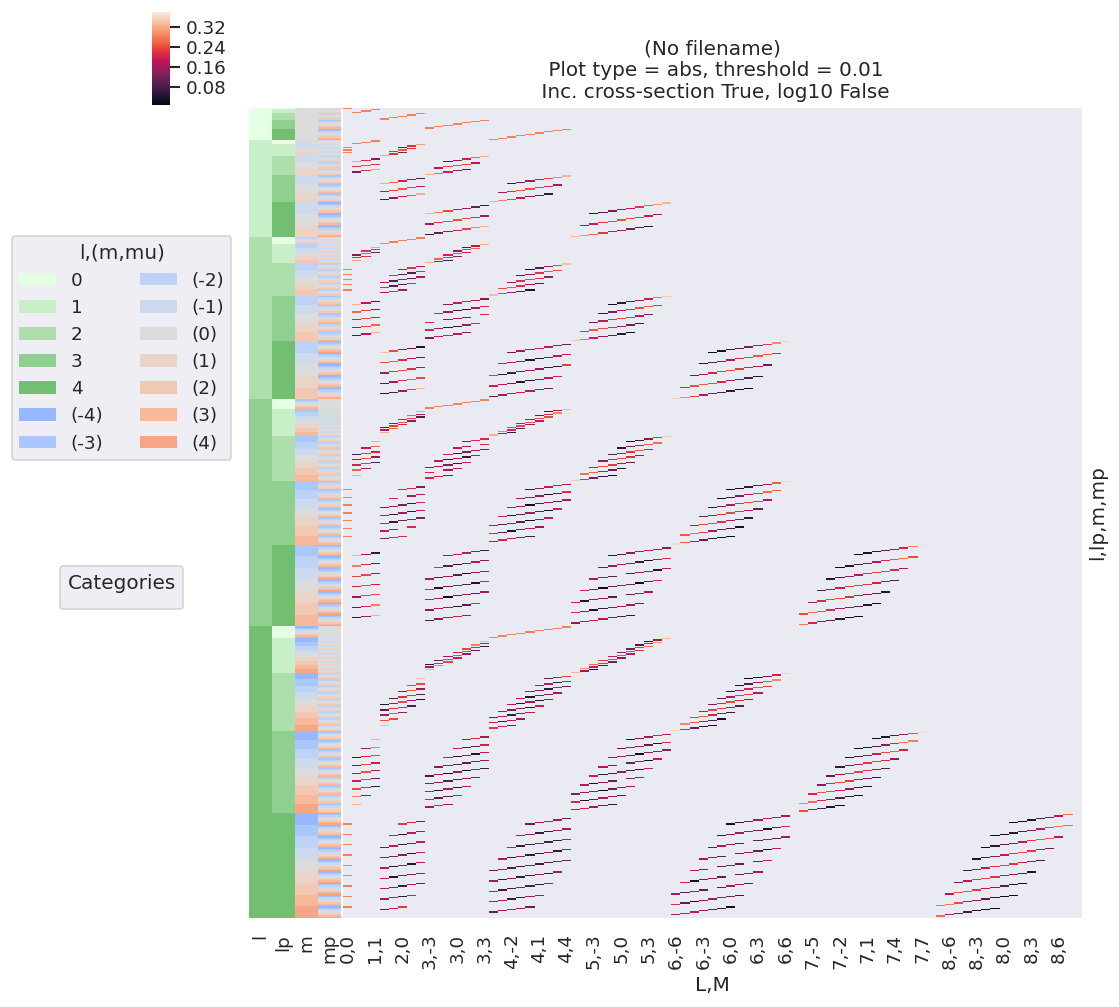

In [16]:
#*** Plot BLM terms for basis set - basic case
basisKey = 'BLMtableResort'

# Basic plot
ep.lmPlot(basisPlot, xDim=stackDims);  # Basic plot with all terms

Plotting data (No filename), pType=r, thres=0.01, with Seaborn


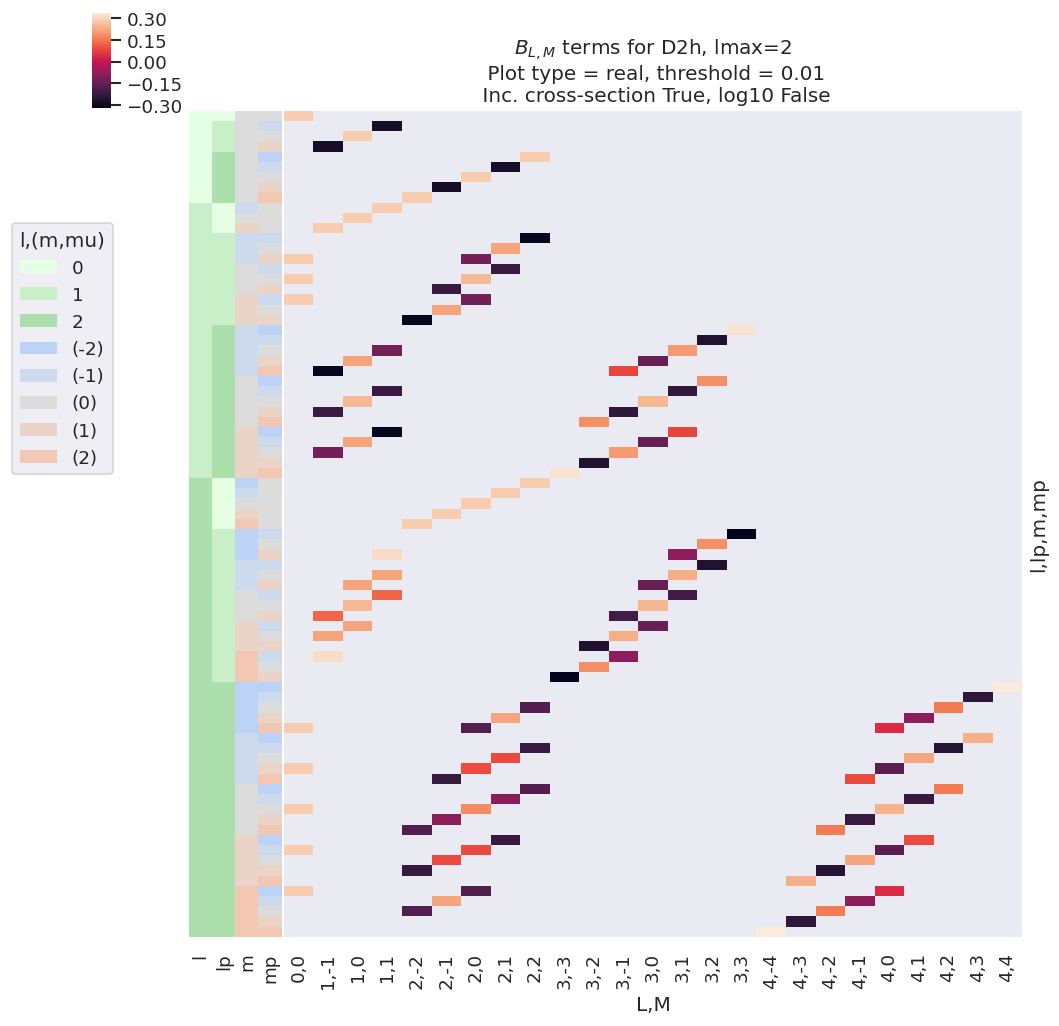

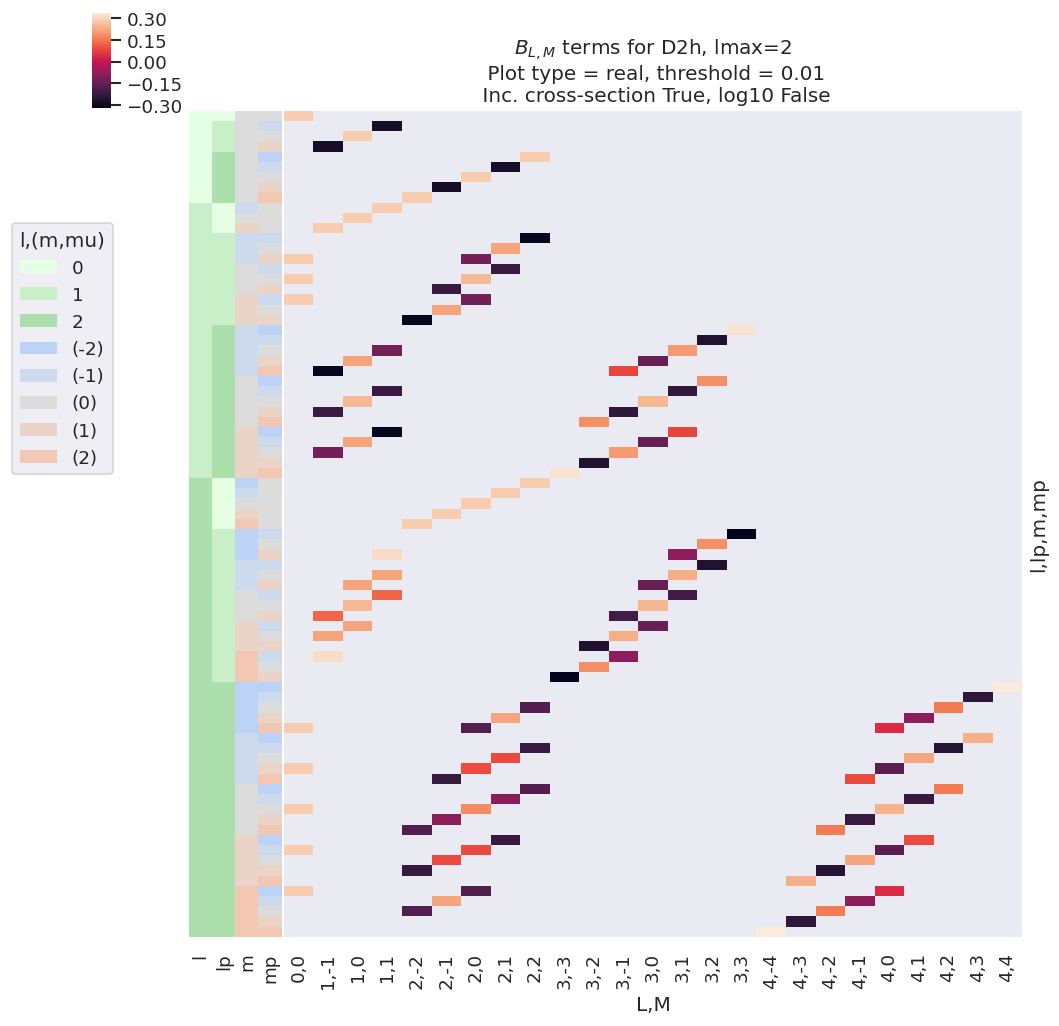

In [32]:
#*** Plot BLM terms for basis set - plot with some additional figure formatting options

# Formatting options
titleString=f'$B_{{L,M}}$ terms for {sym}, lmax={lmaxPlot}'
titleDetails=True
labelRound = 1
catLegend=False
labelCols = [1,1]

# cmap = None for default.
# cmap = 'vlag'

# lmPlot with various options
*_, gFig = ep.lmPlot(basisPlot.where((basisPlot.l<=lmaxPlot) 
                                                & (basisPlot.lp<=lmaxPlot)), 
                                               xDim=stackDims, pType = 'r', 
                                               cmap=cmap, labelRound = labelRound, 
                                               catLegend=catLegend, 
                                               titleString=titleString, titleDetails=titleDetails, 
                                               labelCols = labelCols);

# Glue figure
glue("lmPlot_BLM_basis_D2h", gFig.fig, display=False)

```{glue:figure} lmPlot_BLM_basis_D2h
---
name: "fig-BLM-basis-D2h"
---
Example $B_{L,M}$ basis functions for {glue:text}`symHarmPGmatE` symmetry. Note figure is truncated to $l_{max}=l'_{max}=${glue:text}`symHarmBasislmaxPlot` for clarity.
```

(sec:theory:EPR-term)=
## Electric field geometric coupling term ${E_{P,R}(\hat{e};\mu_{0})}$

The coupling of two 1-photon terms (which arises in the square of the ionization matrix element as per Eq. {eq}`eq:I-reduced-LF-2_45-vol1`) can be written as a tensor contraction:

\begin{equation}
E_{PR}(\hat{e})=[e\otimes e^{*}]_{R}^{P}=[P]^{\frac{1}{2}}\sum_{p}(-1)^{R}\left(\begin{array}{ccc}
1 & 1 & P\\
p & R-p & -R
\end{array}\right)e_{p}e_{R-p}^{*}\label{eq:EPR-defn-1}
\end{equation}

Where: 

- $e_{p}$ and $e_{R-p}$ define the field strengths for the polarizations $p$ and $R-p$, which are coupled into the spherical tensor $E_{PR}$; 
- square-brackets indicate degeneracy terms, e.g. $[P]^{\frac{1}{2}} = (2P+1)^{\frac{1}{2}}$;
- the symbol $\mu_{0}$ is conventionally used to denote the {{ LF }} field projection definition, given in full as $(1,\mu_0)$ for the 1-photon case, **in general for the LF/AF case $\mu_0=p$, while for the MF case all projection terms are allowed, and are usually labelled by $\mu$ or $q$.** TO FIX

(To derive this result, one can start from, e.g., Eq. 5.40 in Zare

\begin{equation}
[A^{(1)}\otimes B^{(1)}]_{q}^{k}=\sum_{m}\langle1m,1q-m|kq\rangle A(1,m)B(1,q-m)
\end{equation}

Convert to $3j$ form:

\begin{equation}
[A^{(1)}\otimes B^{(1)}]_{q}^{k}=\sum_{m}(-1)^{q}[k]^{1/2}\left(\begin{array}{ccc}
1 & 1 & k\\
m & q-m & -q
\end{array}\right)A(1,m)B(1,q-m)
\end{equation}

And substitute in appropriate terms.)

As before, we can visualise these values...

In [ ]:
# For illustration, recompute EPR term for default case.
EPRX = ep.geomCalc.EPR(form = 'xarray')

# Set parameters to restack the Xarray into (L,M) pairs
# plotDimsRed = ['l', 'p', 'lp', 'R-p']
plotDimsRed = ['p', 'R-p']
xDim = {'PR':['P','R']}

# Plot with ep.lmPlot(), real values
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(EPRX, plotDims=plotDimsRed, xDim=xDim, pType = 'r')
# Version summed over l,m
# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(EPRX.unstack().sum(['l','lp','R-p']), xDim=xDim, pType = 'r')

# For glue
glue("lmPlot_EPR_basis", gFig.fig, display=False)

```{glue:figure} lmPlot_EPR_basis
---
name: "fig-EPR-basis"
---
Example $E_{P,R}$ basis functions. Note that for linearly polarised light $p=R-p=0$ only, hence only the terms $E_{0,0}$ and $E_{2,0}$ are non-zero in this case. For non-linearly polarised cases many other terms are allowed.
```

(sec:theory:lambda-term)=
## Molecular frame projection term $\Lambda$

For the molecular frame case, the coupling between the {{ LF }} and {{ MF }} can be defined by a projection term, $\Lambda_{R',R}(R_{\hat{n}})$:

$$
\Lambda_{R',R}(R_{\hat{n}})=(-1)^{(R')}\left(\begin{array}{ccc}
1 & 1 & P\\
\mu & -\mu' & R'
\end{array}\right)D_{-R',-R}^{P}(R_{\hat{n}})
$$ (eq:basis-lambda-MF-defn)

This is similar to the $E_{PR}$ term, and essentially rotates it into the {{ MF }}, defining the projections of the polarization vector (photon angular momentum) $\mu$ into the {{ MF }} for a given molecular orientation (frame rotation) defined by $R_{\hat{n}}$. 

% And the the $\Lambda_{R',R}$ term is a simplified form of the previously derived MF term:

For the {{ LF }}/{{ AF }} case, the same term appears but in a simplified form:

$$
\bar{\Lambda}_{R'}=(-1)^{(R')}\left(\begin{array}{ccc}
1 & 1 & P\\
\mu & -\mu' & R'
\end{array}\right)\equiv\Lambda_{R',R'}(R_{\hat{n}}=0)
$$ (eq:basis-lambda-LF-defn)

This form pertains since - in the {{ LF }}/{{ AF }} case - there is no specific frame transformation defined (i.e. there is no single molecular orientation defined in relation to the light polarization, rather a distribution as defined by the {{ ADMs }}), but the total angular momentum coupling of the photon terms is still required in the equations.

Numerically, the function is calculated for a specified set of orientations, which default to the standard set of $(x,y,z)$ MF polarization cases. For the LF/AF case, this term is still used, but restricted to $R_{\hat{n}} = (0,0,0) = z$, i.e. no frame rotation relative to the {{ LF }} $E_{PR}$ definition.

TODO: frame rotation illustration as well as term plots? Cf. QM1?

(sec:theory:AF-alignment-term)=
## Alignment tensor $\Delta_{L,M}(K,Q,S)$

Finally, for the {{ LF }}/{{ AF }} case, the alignment tensor couples the molecular axis ensemble (defined as a set of {{ ADMs }}) and the photoionization multipole terms into the final observable. 

$$
\Delta_{L,M}(K,Q,S)=(2K+1)^{1/2}(-1)^{K+Q}\left(\begin{array}{ccc}
P & K & L\\
R & -Q & -M
\end{array}\right)\left(\begin{array}{ccc}
P & K & L\\
R' & -S & S-R'
\end{array}\right)
$$ (eq:basis-alignmentTensor-defn)

In the full equations for the observable, this term appears in a summation with the {{ ADMs }}, as:

$$
\tilde{\Delta}_{L,M}(t) = \sum_{K,Q,S}\Delta_{L,M}(K,Q,S)A_{Q,S}^{K}(t)
$$ (eq:basis-aligmentTerm-defn)

% TODO: decide on notation here, may have decided on this previously? (But not in MF recon paper or QM2). Standard symbol for averaged property? Don't want to use bar to avoid LF/MF confusion? Or could...?
% \overbar, \ddot ?

This summed alignment term can be considered, essentially, as a (coherent) geometric averaging of the {{ MF }} observable weighted by the axis distribution in the {{ AF }} (for more on the axis averaging as a convolution, see Refs. {cite}`Underwood2000,hockett2018QMP1`); equivalently, the averaging can be considered as a purely angular-momentum coupling effect, which accounts for all contributing moments of the various aspects of the system, and defines the allowed projections onto the final observables in the {{ LF }}. 

Mappings of these terms are investigated numerically below, for some examplar cases.

(sec:theory:AF-alignment-term-basic)=
### Basic cases

{numref}`fig-deltaTerm000` illustrates the alignment tensor $\Delta_{L,M}(K,Q,S)$ for some basic cases, and values are also tabulated in {numref}`tab-deltaTerm000`. Note that for illustration purposes the term is subselected with $K=0$, $Q=0$, $S=0$ and $R'=0$; $R\neq0$ terms are included to illustrate the elliptically-polarized case, which can give rise to non-zero $M$ terms.

For the simplest case of an unaligned ensemble, this term is restricted to $K=Q=S=0$, i.e. $\Delta_{L,M}(0,0,0)$; for single-photon ionization with linearly-polarized light ($p=0$, hence $P=0,2$ and $R=R'=0$), this has non-zero values for $L=0,2$ and $M=0$ only. Typically, this simplest case is synonymous with standard {{ LF }} results, and maintains cylindrical and up-down symmetry in the observable.

For circularly polarized light ($p=\pm1$, hence $P=0,1,2$ and $R=R'=0$), odd-$L$ is allowed, signifying up/down symmetry breaking in the observable (where up/down pertains to the propagation direction of the light, conventionally the $z$-axis). For elliptically polarized light, mixing of terms with different $p$ allows for non-zero $R$ terms, hence non-zero $M$ is allowed, signifying breaking of cylindrical symmetry in the observable.

In [ ]:
#*** Set range of ADMs for test as time-dependent values - single call
# AKQS = ep.setADMs(ADMs = [[0,0,0,1,1,1,1],
#                           [2,0,0,0,0.5,1,1],
#                           [4,0,0,0,0,0,0.3]])  #, t=[0,1,2])    # Nested list or np.array OK.
# AKQS = ep.setADMs(ADMs = np.array([[0,0,0,1,1],[2,0,0,0,0.5]]), t=[0,1])

#*** Alternative form with ADM inds separate
# ADMinds = np.array([[0,0,0],[2,0,0],[4,0,0]])
# AKQS = ep.setADMs(ADMs = np.stack((np.ones(4),np.linspace(0,1,4),np.linspace(0,0.2,4))),
#                   KQSLabels=ADMinds)


# For computation set ADMs and EPR term first.
# Note that delta term is independent of the absolute values of the ADMs(t), but does use this term to define limits on some quantum numbers.

#*** Neater version
# Set ADMs for increasing alignment...
tPoints = 10
inputADMs = [[0,0,0, *np.ones(tPoints)],     # * np.sqrt(4*np.pi)],  # Optional multiplier for normalisation
             [2,0,0, *np.linspace(0,1,tPoints)], 
             [4,0,0, *np.linspace(0,0.5,tPoints)],
             [6,0,0, *np.linspace(0,0.3,tPoints)],
             [8,0,0, *np.linspace(0,0.2,tPoints)]]

AKQS = ep.setADMs(ADMs = inputADMs)  # TODO WRAP TO CLASS (IF NOT ALREADY!)


#*** Plot ADMs
# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AKQS, xDim = 't', pType = 'r', squeeze = False, thres=None, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)
# daPlotpd

# Example alignment term, assuming all other terms allow/unity valued.

# Use default EPR term - note this computes for all pol states, p=[-1,0,1]
EPR = ep.geomCalc.EPR(form='xarray')

# Compute alignment terms
AFterm, DeltaTerm = ep.geomCalc.deltaLMKQS(EPR, AKQS)

#*** Plot Delta term with subselections
# xDim = {'KQ':['K','Q']}
xDim = {'LM':['L','M']}
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(DeltaTerm.sel(K=0,Q=0,S=0,Rp=0).sel({'S-Rp':0}), xDim = xDim, pType = 'r', squeeze = False, thres=None) #, cmap='vlag') # , fillna=True)  # Note squeeze = False required for 1D case (should add this to code!)
# daPlotpd.fillna('')

# Glue versions for JupyterBook output
glue("deltaTerm000-lmPlot", gFig.fig, display=False)
glue("deltaTerm000-tab",daPlotpd.fillna(''), display=False)  # As above, but with PD object return and glue.

```{glue:figure} deltaTerm000-lmPlot
---
name: "fig-deltaTerm000"
---
Example $\Delta_{L,M}(0,0,0)$ basis functions (see also {numref}`tab-deltaTerm000`). For illustration purposes, the plot only shows terms for $R'=0$. See main text for discussion.
```

```{glue:figure} deltaTerm000-tab
---
name: "tab-deltaTerm000"
---
Example $\Delta_{L,M}(0,0,0)$ basis functions (see also {numref}`fig-deltaTerm000`). For illustration purposes, the table only shows terms for $R'=0$. See main text for discussion.
```

In [ ]:
#*** Plot ADMs
daPlot, daPlotpd, legendList, ADMFig = ep.lmPlot(AKQS, xDim = 't', pType = 'r', squeeze = False, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)
# daPlotpd

#*** Plot subsection
daPlot, daPlotpd, legendList, AFFig = ep.lmPlot(AFterm.sel(R=0).sel(Rp=0).sel({'S-Rp':0}), 
                                               xDim = 't', pType = 'r', squeeze = False, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)

# Glue versions for JupyterBook output
glue("ADMs-linearRamp-lmPlot", ADMFig.fig, display=False)
glue("AFterm-linearRamp-lmPlot", AFFig.fig, display=False)

```{glue:figure} ADMs-linearRamp-lmPlot
---
name: "fig-ADMs-linearRamp"
---
Example ADMs used for {{ AF }} basis function example (see {numref}`fig-AFterm-linearRamp`). These ADMs essentially show an increasing degree of alignment with the $t$ parameter, with high-order terms increasing at later $t$.
```

```{glue:figure} AFterm-linearRamp-lmPlot
---
name: "fig-AFterm-linearRamp"
---
Example of $\tilde{\Delta}_{L,M}(t)$ basis values for various choices of alignment (as per {numref}`fig-ADMs-linearRamp`). The ADMs essentially show an increasing degree of alignment with the $t$ parameter, with high-order terms increasing at later $t$, and this is reflected in the $\tilde{\Delta}_{L,M}(t)$ terms with higher-order $L$ appearing at later $t$.
```

% and Figs. XX and XX show $\tilde{\Delta}_{L,M}(t)$ for various choices of alignment.

For cases with aligned molecular ensembles, additional terms can similarly appear depending on the alignment as well as the properties of the ionizing radiation. Again, the types of terms follow some typical patterns dependent on the symmetry of the ensemble, as well as the order of the terms allowed. For instance, $L_{max}=P_{max}+K_{max}=2+K_{max}$, and $K_{max}$ represents the overall degree of alignment of the ensemble; hence an aligned ensemble may be signified by higher-order terms in the observable (if allowed by other terms in the overall expansion) or, equivalently, aligning an ensemble prior to ionization can be used as a way to control which terms contribute to the alignment tensor.

Since this is a coherent averaging, additional interferences can also appear in the {{ AF }} - or be restricted in the {{ AF }} - depending on these geometric parameters and the contributing matrix elements. Additionally, any effects modulating these terms, for instance a time-dependent alignment (rotational wavepacket), vibronic dynamics (vibrational and/or electronic wavepacket), time-dependent laser field (control field) may be anticipted to lead to both changes in these terms and, potentially, interesting effects in the observable. Such effects have been discussed in more detail in {{ QM2 }}, and in the current case the focus is purely on rotational wavepackets.

{numref}`fig-AFterm-linearRamp` shows $\tilde{\Delta}_{L,M}(t)$ for various choices of alignment (as per the {{ ADMs }} shown in {numref}`fig-ADMs-linearRamp`), and illustrates some of the general features discussed. Note, for example:

- $L_{max}$ varies with alignment; in the demonstration case $K_{max}=8$ at later times, resulting in $L_{max}=10$, whilst at $t=0$ $K_{max}=0$, thus restricting terms to $L_{max}=2$.
- Odd-$L$ values are correlated with $P=1$ terms.
- Only $M=0$ terms are allowed in this case ($Q=S=0$).

(sec:theory:AF-alignment-term-3D)=
### 3D alignments and symmetry breaking

As discussed above, for the case where $Q\neq0$ and/or $S\neq0$ additional symmetry breaking can occur. It is simple to examine these effects numerically via changing the trial {{ ADMs }} used to determine $\tilde{\Delta}_{L,M}(t)$ (Eq. {eq}`eq:basis-aligmentTerm-defn`).

% TODO: is calculation below correct...? Have M!=0 terms OK, not sure otherwise!
% TODO: revise calcs, should R' be treated directly/propagated elsewhere, or will be set manually?
% TODO: more representative alignment terms?

In [ ]:
#*** Neater version
# Set ADMs for increasing alignment...
tPoints = 10
inputADMs3D = [[0,0,0, *np.ones(tPoints)],     # * np.sqrt(4*np.pi)],  # Optional multiplier for normalisation
             [2,0,0, *np.linspace(0,1,tPoints)], 
             [2,0,2, *np.linspace(0,0.5,tPoints)],
             [2,2,0, *np.linspace(0,0.5,tPoints)],
             [2,2,2, *np.linspace(0,0.8,tPoints)]]

AKQS = ep.setADMs(ADMs = inputADMs3D)  # TODO WRAP TO CLASS (IF NOT ALREADY!)

# Compute alignment terms
AFterm, DeltaTerm = ep.geomCalc.deltaLMKQS(EPR, AKQS)

#*** Plot all
# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AFterm,    #.sel(R=0).sel(Rp=0), 
#                                                xDim = 't', pType = 'r', squeeze = False, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)


#*** Plot subsection, L<=2
# .sel(R=0).sel(Rp=0) gives M=0 terms only for R=Rp=0
# .sel(R=0) gives M=0 terms only
# .sel(Rp=0) gives M!=0 terms, S-Rp=0 terms only

daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AFterm.where(AFterm.L<=2).sel(Rp=0),    # .sel(R=0).sel(Rp=0), #M=0 for R=Rp=0
                                               xDim = 't', pType = 'r', squeeze = False, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)

# Glue versions for JupyterBook output
glue("ADMs-3DlinearRamp-lmPlot", gFig.fig, display=False)

```{glue:figure} ADMs-3DlinearRamp-lmPlot
---
name: "fig-ADMs-3DlinearRamp"
---
Example $\tilde{\Delta}_{L,M}(t)$ basis values for various choices of "3D" alignment, i.e. including some $K\neq0$ and $S\neq0$ terms. Note, in particular, the presence of $M\neq0$ terms in general, and a complicated dependence of the allowed terms on the alignment ({{ ADMs }}), which may increase, decrease, or even change sign for a given $L,M$.
```

In [ ]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AFterm.where(AFterm.L<=2).sel(M=1),    # .sel(R=0).sel(Rp=0), #M=0 for R=Rp=0
                                               xDim = 't', pType = 'r', squeeze = False, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)

In [ ]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(AFterm.where(AFterm.L<=2).sel(M=2),    # .sel(R=0).sel(Rp=0), #M=0 for R=Rp=0
                                               xDim = 't', pType = 'r', squeeze = False, cmap='vlag')  # Note squeeze = False required for 1D case (should add this to code!)

For illustration purposes, {numref}`fig-ADMs-3DlinearRamp` shows a subselection of the $\tilde{\Delta}_{L,M}(t)$ basis values, indicating some of the key features in the full 3D case, subselected for $L\leq2$ and $R'=0$ terms only. 
%; Fig. XX shows the subset with $L\leq2$ and $M=1$; Fig. XX shows the subset with $L\leq2$ and $M=2$. 

Note, in particular, the presence of $M\neq0$ terms in general, and a complicated dependence of the allowed terms on the alignment, which may increase, decrease, or even change sign. % TODO: give more explict examples here, may want to also reduce and consolidate illustrations further?
As previously, these behaviours are generally useful for understanding specific cases or planning experiments for specific systems; this is explored further in Part II which focuses on the results for particular molecules (hence symmetries and sets of matrix elements).

(sec:theory:tensor-products)=
## Tensor product terms

% TODO: manual composition of tensor product terms OR recalc from full basis as per above with alignment terms.
% See main afblmGeom routine for details.

Following the above, further resultant terms can also be examined, up to and including the full channel functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$ (see {eq}`eqn:channel-fns`) for a given case. Numerically these are all implemented in the main {{ ePSproc_full }}, and can be returned by these functions for inspection - the full basis set already defined includes some of these product. Custom tensor product terms are also readily computed with the codebase, with tensor multiplications handled natively by the Xarray data objects.

% These terms are defined as follows:

% TODO: formal definitions to match code (already done somewhere...?) PolProd etc.
% SEE MF RECON MANUSCRIPT NOTEBOOKS for this, and Sect 4.1.7 therein (Figs 14 & 15). Don't recall where source code is off-hand... TRY TRELLO, also D:\temp\docker_stimpy_builds\notebooks\pemtk_fitting_runs_April2022\analysis_dev probably (`stimpy-docker-local` in shared dirs).  AH: http://jake/jupyter/user/paul/lab/workspaces/MFreconBasisSets AND https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basis-set_demo_050621-full.html

Polarisation & ADM product term: the main product basis returned, `polProd`, contains the tensor product $\Lambda_{R}\otimes E_{PR}(\hat{e})\otimes \Delta_{L,M}(K,Q,S)\otimes A^{K}_{Q,S}(t)$, expanded over all quantum numbers (see [full definition here](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html#\beta_{L,M}^{AF}-rewrite)). This term, therefore, incorporates all of the dependence (or response) of the AF-$\beta_{LM}$s on the polarisation state, and the axis distribution. Example results, making use of the linear-ramp {{ ADMs }} of {numref}`Sect. %s <sec:theory:AF-alignment-term-basic>` are illustrated in {numref}`fig-polProd-linearRamp`.

The full channel (response) functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$ as defined in {eq}`eq:channelFunc-MF-defn` and {eq}`eq:channelFunc-AF-defn` can be determined by the product of this term with the $B_{L,M}$ tensor. This is essentially the complete geometric basis set, 
% ([give or take a phase term or two](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620_010920_dev_bk100920.html#\beta_{L,M}^{AF}-rewrite)), 
hence equivalent to the AF-$\beta_{LM}$ if the ionization matrix elements were set to unity. This illustrates not only the coupling of the geometric terms into the observable $L,M$, but also how the partial wave $|l,m\rangle$ terms map to the observables, and hence the sensitivity of the observables to given partial wave properties. Example results, making use of the linear-ramp {{ ADMs }} of {numref}`Sect. %s <sec:theory:AF-alignment-term-basic>` are illustrated in {numref}`fig-channelFunc-linearRamp`.

In [ ]:
# Set data - set example ADMs to data structure & subset for calculation
data.setADMs(ADMs = inputADMs)
data.setSubset(dataKey = 'ADM', dataType = 'ADM')

# Using PEMtk - this only returns the product basis set as used for fitting
BetaNormX, basisProduct = data.afblmMatEfit(selDims={}, sqThres=False)

In [ ]:
basisKey = 'polProd'  # Key for BLM basis set

# Reformat basis for display (optional)
# stackDims = {'LM':['L','M']}
# basisPlot = basis[basisKey].rename({'S-Rp':'M'}).stack(stackDims)

# Convert to Pandas
# pd, _ = ep.multiDimXrToPD(basisPlot, colDims=stackDims)

# Subselect on pol state
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(basisProduct[basisKey].sel(Labels='A'), xDim='t', cmap = cmap, mDimLabel='mu'); # , cmap='vlag');  # Subselect on pol state
# ep.lmPlot(basisProduct[basisKey], xDim='t', cmap = cmap); # , cmap='vlag');  # Subselect on pol state

# Glue versions for JupyterBook output
glue("polProd-linearRamp-lmPlot", gFig.fig, display=False)

In [ ]:
# Channel functions
daPlot, daPlotpd, legendList, gFig =  ep.lmPlot((basisProduct['BLMtableResort'] * basisProduct['polProd']).sel(Labels='A').sel({'S-Rp':0}).sel(L=2), xDim='t', cmap=cmap, mDimLabel='m');  # Basic case
# ep.lmPlot((basis['BLMtableResort'] * basis['polProd']), xDim='t', cmap='vlag');

# Glue versions for JupyterBook output
glue("channelFunc-linearRamp-lmPlot", gFig.fig, display=False)

```{glue:figure} polProd-linearRamp-lmPlot
---
name: "fig-polProd-linearRamp"
---
Example product basis function for the polarisation and ADM terms.
```

```{glue:figure} channelFunc-linearRamp-lmPlot
---
name: "fig-channelFunc-linearRamp"
---
Example of $\bar{\varUpsilon_{}}_{L,M}^{u,\zeta\zeta'}$ basis values for various choices of alignment (as per {numref}`fig-ADMs-linearRamp`), shown for $L=2$ only. The basis essentially shows the obsevable terms if the ionization matrix elements are neglected, hence the sensitivity of the configuration to each pair of partial wave terms. Note, in general, that the sensitivity to any given pair $$\langle l',m'|l,m\rangle$, increases with alignment (hence with $t$ in this example) for the linear polarisation case ($\mu=\mu'=0$), but typically decreases with alignment for cross-polarised terms. 

```

% NOW MOVED TO SEPARATE NOTEBOOK TO TRY AND FIX FIG RENDERING ISSUES

(sec:density-mat-basic)=
## Density matrix representation

% TODO: numerical examples here
% TODO: decide on notation, \Psi_c == \mathbf{k}?
% 30/01/23 extended with notes from MF recon article.

The density operator associated with the continuum state in Eq. {eq}`eq:continuum-state-vec` is easily written as $\hat{\rho}=|\Psi_c\rangle\langle\Psi_c|\equiv|\mathbf{k}\rangle\langle\mathbf{k}|$. [^blumFootnote] The full final continuum state as a density matrix in the $\zeta\zeta'$ representation (with the observable dimensions $L,M$ explicitly included in the density matrix), which will also be dependent on the choice of channel functions ($u$), can then be given as

[^blumFootnote]: For general discussion of density matrix techniques and applications in AMO physics, see Blum's textbook `Density Matrix Theory and Applications` {cite}`BlumDensityMat`, which is referred to extensively herein.

$$
{\rho}_{L,M}^{u,\zeta\zeta'}=\varUpsilon_{L,M}^{u,\zeta\zeta'}\mathbb{I}^{\zeta,\zeta'}
$$ (eqn:full-density-mat)

Here the density matrix can be interpreted as the final, LF/AF or MF density matrix (depending on the channel functions used), incorporating both the intrinsic and extrinsic effects (i.e. all channel couplings and radial matrix elements for the given measurement), with dimensions dependent on the unique sets of quantum numbers required - in the simplest case, this will just be a set of partial waves $\zeta = (l,m)$. 

In the channel function basis, this leads to a (radial or reduced) density matrix given by the radial matrix elements:

% Safe version - no bold
$$
\rho^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
$$ (eqn:radial-density-mat)

This form encodes purely intrinsic (molecular scattering) photoionization dynamics (thus characterises the scattering event), whilst the full form ${\rho}_{L,M}^{u,\zeta\zeta'}$ of Eq. {eq}`eqn:full-density-mat` includes any additional effects incorporated via the channel functions. For reconstruction problems, it is usually the reduced form of Eq. {eq}`eqn:radial-density-mat` that is of interest, since the remainder of the problem is already described analytically by the channel functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$. In other words, the retrieval of the radial matrix elements $\mathbb{I}^{\zeta,\zeta'}$ and the radial density matrix $\rho^{\zeta\zeta'}$ are equivalent, and both can be viewed as completely describing the photoionization dynamics.

The $L,M$ notation for the full density matrix ${\rho}_{L,M}^{u,\zeta\zeta'}$ (Eq. {eq}`eqn:full-density-mat`) indicates here that these dimensions should not be summed over, hence the tensor coupling into the $\beta_{L,M}^{u}$ parameters can also be written directly in terms of the density matrix:

$$
\beta_{L,M}^{u}=\sum_{\zeta,\zeta'}{\rho}_{L,M}^{u,\zeta\zeta'}
$$ (eqn:beta-density-mat)

In fact, this form arises naturally since the $\beta_{L,M}^{u}$ terms are the state multipoles (geometric tensors) defining the system, which can be thought of as a coupled basis equivalent of the density matrix representations (see, e.g., Ref. {cite}`BlumDensityMat`, Chpt. 4.).

In a more traditional notation (following Eq. {eq}`eq:continuum-state-vec`, see also Ref. {cite}`gregory2022LaboratoryFrameDensitya`), the density operator can be expressed as:

$$
\rho(t) =\sum_{LM}\sum_{KQS}A^{K}_{QS}(t)\sum_{\zeta\zeta^{\prime}}\varUpsilon_{L,M}^{u,\zeta\zeta'}|\zeta,\Psi_+\rangle\langle\zeta,\Psi_+|\mu_q\rho_i\mu_{q\prime}^{*}|\zeta^{\prime},\Psi_+\rangle\langle\zeta^{\prime},\Psi_+|
$$ (eqn:full-density-mat-traditional)

with $\rho_i = |\Psi_i\rangle\langle\Psi_i|$. This is, effectively, equivalent to an expansion in the various tensor operators defined above, in a standard state-vector notation.

The main benefit of a density matrix representation in the current work is as a rapid way to visualize the phase relations between the photoionization matrix elements (the off-diagonal density matrix elements), and the ability to quickly check the overall pattern of the elements, hence confirm that no phase-relations are missing and orthogonality relations are fulfilled - some examples are given below. Since the method for computing the density matrices is also numerically equivalent to a tensor outer-product, density matrices and visualizations can also be rapidly composed for other properties of interest, e.g. the various channel functions defined herein, providing another complementary methodology and tool for investigation. (Further examples can be found in the {{ ePSproc_docs }}, as well as in the literature, see, e.g., Ref. {cite}`BlumDensityMat` for general discussion, Ref. {cite}`Reid1991` for application in pump-probe schemes.) 

Furthermore, as noted above, the density matrix elements provide a complete description of the photoionization event, and hence make clear the equivalence of the ``complete" photoionization experiments (and associated continuum reconstruction methods) discussed herein, with general quantum tomography schemes {cite}`MauroDAriano2003`. The density matrix can also be used as the starting point for further analysis based on standard density matrix techniques - this is discussed, for instance, in Ref. {cite}`BlumDensityMat`, and can also be viewed as a bridge between traditional methods in spectroscopy and AMO physics, and more recent concepts in the quantum information sciences (see, e.g., Refs. {cite}`Tichy2011a,Yuen-Zhou2014` for recent discussions in this context).

% Additional notes for density matrices

% Safe version - no bold
$$\rho^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
$$ (eqn:radial-density-mat)

% This form is OK in HTML output, but fails in PDF
% $$\mathbf{\rho}^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
% $$ (eqn:radial-density-mat)

% This form is OK in PDF output, but fails in HTML
% $$\boldsymbol{\rho}^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
% $$ (eqn:radial-density-mat)

% See QM3/doc-source/tests/formatting_syntax_tests_081122.ipynb for more render tests

% Since the matrix elements characterise the scattering event, the density matrix provides an equivalent characterisation of the scattering event. 
% An example case is discussed in Sect. [\[sec:den-mat-N2\]](#sec:den-mat-N2){reference-type="ref" reference="sec:den-mat-N2"} (see Fig. [11](#998904){reference-type="ref" reference="998904"}); for more details, and further discussion, see Sect. [\[sec:density-mat-full\]](#sec:density-mat-full){reference-type="ref" reference="sec:density-mat-full"}.

Further discussion can also be found in the literature, see, e.g., Ref. {cite}`BlumDensityMat` for general discussion, Ref. {cite}`Reid1991` for application in pump-probe schemes.

In [ ]:
# DEMO CODE FROM http://jake/jupyter/user/paul/doc/tree/code-share/stimpy-docker-local/MFPADs_recon_manuscript_dev_April_2022/MFrecon_manuscript_fig_generation_170422-Stimpy_MAIN-oldPkgs.ipynb
# SEE ALSO DOCS, https://epsproc.readthedocs.io/en/dev/methods/density_mat_notes_demo_300821.html#Density-Matrices

# Import routines
from epsproc.calc import density

# Compose density matrix

# Set dimensions/state vector/representation
# These must be in original data, but will be restacked as necessary to define the effective basis space.
denDims = 'LM'  #, 'mu']
selDims = None  #{'Type':'L'}
pTypes=['r','i']
thres = 1e-4    # 0.2 # Threshold out l>3 terms if using full 'orb5' set.
normME = False
normDen = 'max'

# Calculate - Ref case
# matE = data.data['subset']['matE']
# Set data from master class
# k = 'orb5'  # N2 orb5 (SG) dataset
# k = 'subset'
k = sym
matE = data.data[k]['matE']
if normME:
    matE = matE/matE.max()

daOut, *_ = density.densityCalc(matE, denDims = denDims, selDims = selDims, thres = thres)  # OK

if normDen=='max':
    daOut = daOut/daOut.max()
elif normDen=='trace':
    daOut = daOut/(daOut.sum('Sym').pipe(np.trace)**2)  # Need sym sum here to get 2D trace
    
# daPlot = density.matPlot(daOut.sum('Sym'))
daPlot = density.matPlot(daOut.sum('Sym'), pTypes=pTypes)

# # Retrieved
# matE = data.data['agg']['matE']['compC']
# if normME:
#     matE = matE/matE.max()

# daOut2, *_ = density.densityCalc(matE, denDims = denDims, selDims = selDims, thres = thres)  # OK

# if normDen=='max':
#     daOut2 = daOut2/daOut2.max()
# elif normDen=='trace':
#     daOut2 = daOut2/(daOut2.sum('Sym').pipe(np.trace)**2)
    
# daPlot2 = density.matPlot(daOut2.sum('Sym'), pTypes=pTypes)   #.sel(Eke=slice(0.5,1.5,1)))


# # Compute difference
# daDiff = daOut.sum('Sym') - daOut2.sum('Sym')
# daDiff.name = 'Difference'
# daPlotDiff = density.matPlot(daDiff, pTypes=pTypes)

# #******** Plot
# daLayout = (daPlot.layout('pType') + daPlot2.opts(show_title=False).layout('pType').opts(show_title=False) + daPlotDiff.opts(show_title=False).layout('pType')).cols(1)  # No cols? AH - set to 1 works.
# # daLayout.opts(width=300, height=300)  # Doesn't work?
# daLayout.opts(hvPlotters.opts.HeatMap(width=300, frame_width=300, aspect='square', tools=['hover'], colorbar=True, cmap='coolwarm'))  # .opts(show_title=False)  # .opts(title="Custom Title")  #OK

In [ ]:
daPlot

In [ ]:
!date

## SCRATCH

30/01/23 testing further density mat stuff.

In [ ]:
# As above, but for a time-dependent case...
# SHOULD BE per http://jake/jupyter/user/paul/doc/tree/code-share/jupyter-shared/PEMtk_dev_2022/basisSets/PEMtk_fitting_basis-set_demo_050621-full-revisit-Jake_040822.ipynb
# BUT CURRENTLY not working - issue with dims and/or recent code changes?

# Import routines
from epsproc.calc import density

# Set some test data - here include time-dependence
testBasis = (basis['BLMtableResort'] * basis['polProd']).sel({'Labels':'A', 'S-Rp':0})

# Compose density matrix
# Set dimensions/state vector/representation
# These must be in original data, but will be restacked as necessary to define the effective basis space.
# denDims = 'LM'  #, 'mu']

# denDims = list(set(testBasis.dims) - set('t')) # FAILS on restack, not sure why.
# above gives: ['L', 'mp', 'M', 'l', 'lp', 'mup', 'm', 'mu']
denDims = ['mp','l', 'lp', 'm']

selDims = None  #{'Type':'L'}
pTypes=['r','i']
thres = 1e-4    # 0.2 # Threshold out l>3 terms if using full 'orb5' set.
normME = False
normDen = 'max'

# Calculate - Ref case
# matE = data.data['subset']['matE']
# Set data from master class
# k = 'orb5'  # N2 orb5 (SG) dataset
# k = 'subset'
k = sym
# matE = data.data[k]['matE']
matE = testBasis

if normME:
    matE = matE/matE.max()

daOut, *_ = density.densityCalc(matE, denDims = denDims, selDims = selDims, thres = thres, sumDims=False)   #, compute=False)

if normDen=='max':
    daOut = daOut/daOut.max()
elif normDen=='trace':
    daOut = daOut/(daOut.sum('Sym').pipe(np.trace)**2)  # Need sym sum here to get 2D trace
    
# daPlot = density.matPlot(daOut.sum('Sym'))
daPlot = density.matPlot(daOut.sum('Sym'), pTypes=pTypes)

In [ ]:
type(denDims)
denDims

In [ ]:
ep.util.misc.checkDims(matE, refDims = stackDims, forceStacked = True)

In [ ]:
ep.lmPlot((basisProduct['BLMtableResort'] * basisProduct['polProd']).sel(Labels='A').sel({'S-Rp':0}).sel(L=2), xDim='t', cmap=cmap, mDimLabel='m')

In [ ]:
basisProduct.keys()

In [ ]:
basisFull.keys()

In [ ]:
(basisProduct['BLMtableResort'] * basisProduct['polProd']).sel(Labels='A').sel({'S-Rp':0}) # * basisProduct['BLMRenorm']

In [ ]:
data.data.keys()

In [ ]:
data.data['subset'].keys()

In [ ]:
data.data[sym]['matE']